### Importing all the required file

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
company = pd.read_csv("companies.txt", delimiter = "\t",encoding='ISO-8859-1')

In [5]:
round2 = pd.read_csv("rounds2.csv",encoding='ISO-8859-1')

In [4]:
mapping = pd.read_csv('mapping.csv')

### Analyse company data

In [15]:
company_backup = company.copy()

In [8]:
company.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [7]:
company.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [9]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [10]:
company.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Rushmorefm,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [11]:
company.permalink = company.permalink.str.lower()

In [12]:
company.permalink = company.permalink.str.strip()

In [13]:
company.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/organization/createtrips,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


### Analyse round2 data

In [14]:
round2_backup = round2.copy()

In [22]:
round2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [17]:
round2.company_permalink = round2.company_permalink.str.lower()

In [23]:
round2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 5 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(4)
memory usage: 4.4+ MB


In [21]:
round2 = round2.drop(['funding_round_code'],axis=1)

In [34]:
round2 = round2.dropna(subset=['raised_amount_usd'])

In [35]:
round2.describe(include='all')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
count,94959,94959,94959,94959,9.495900e+04
unique,53915,94959,14,4746,NaN
top,/organization/solarflare,/funding-round/39f36450156d8102176bbe282b9db749,venture,01-01-2014,NaN
freq,19,1,50228,508,NaN
mean,NaN,NaN,NaN,NaN,1.042687e+07
std,NaN,NaN,NaN,NaN,1.148212e+08
min,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,3.225000e+05
50%,NaN,NaN,NaN,NaN,1.680511e+06
75%,NaN,NaN,NaN,NaN,7.000000e+06


In [82]:
investment_group =  round2[(round2.funding_round_type == 'angel') | (round2.funding_round_type == 'venture' )
                  | (round2.funding_round_type == 'seed') | (round2.funding_round_type == 'private_equity')].groupby('funding_round_type')['raised_amount_usd']

In [87]:
totalSum = investment_group.agg('sum')
totalSum

funding_round_type
angel             4.659255e+09
private_equity    1.419254e+11
seed              1.698986e+10
venture           5.901262e+11
Name: raised_amount_usd, dtype: float64

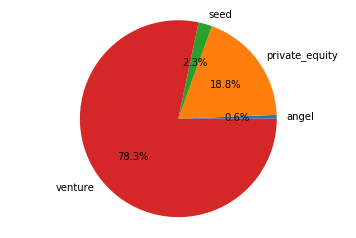

In [246]:
plt.pie(totalSum, labels=totalSum.index, autopct='%1.1f%%')
plt.axis('equal')
#plt.show()
plt.savefig('TotalINvestment.png')

In [86]:
average_investment = investment_group.agg('mean')
average_investment

funding_round_type
angel             9.586945e+05
private_equity    7.330859e+07
seed              7.198180e+05
venture           1.174895e+07
Name: raised_amount_usd, dtype: float64

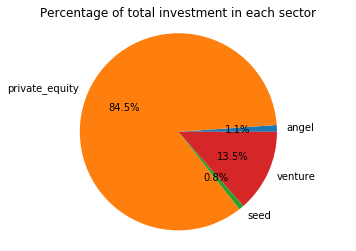

In [243]:
plt.pie(average_investment, labels=average_investment.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of total investment in each sector')
plt.show()
#plt.savefig('InvestementInEachSector.png')

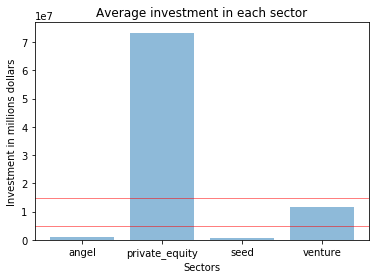

In [245]:
plt.bar(np.arange(len(average_investment.index)), average_investment, align='center', alpha=0.5)
plt.xticks(np.arange(len(average_investment.index)), average_investment.index)
plt.ylabel('Investment in millions dollars')
plt.xlabel('Sectors')
plt.title('Average investment in each sector')
plt.axhline(5000000, color='red', linewidth=0.5)
plt.axhline(15000000, color='red', linewidth=0.5)
plt.show()
#plt.savefig('AverageInvestment')

In [36]:
master_frame = pd.merge(round2, company, how='left', left_on=['company_permalink'], right_on=['permalink'])

In [37]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN


In [38]:
master_frame.describe(include='all')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,94959,94959,94959,94959,9.495900e+04,94958,94957,90626,93914,94958,89108,87355,87911,87914,78992
unique,53915,94959,14,4746,NaN,53914,53740,50378,23484,4,134,302,1048,4351,3551
top,/organization/solarflare,/funding-round/39f36450156d8102176bbe282b9db749,venture,01-01-2014,NaN,/organization/solarflare,Solarflare Communications,http://www.solarflare.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,19,1,50228,508,NaN,19,19,19,7773,73728,62049,22882,16368,6090,3821
mean,NaN,NaN,NaN,NaN,1.042687e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.148212e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,3.225000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.680511e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,7.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
funding = master_frame.groupby(['funding_round_type'])['raised_amount_usd'].agg('mean')

In [42]:
funding

funding_round_type
angel                    9.586945e+05
convertible_note         1.453439e+06
debt_financing           1.704353e+07
equity_crowdfunding      5.383682e+05
grant                    4.300576e+06
non_equity_assistance    4.112031e+05
post_ipo_debt            1.687046e+08
post_ipo_equity          8.218249e+07
private_equity           7.330859e+07
product_crowdfunding     1.363131e+06
secondary_market         7.964963e+07
seed                     7.198180e+05
undisclosed              1.924237e+07
venture                  1.174895e+07
Name: raised_amount_usd, dtype: float64

In [44]:
master_frame = master_frame[master_frame.funding_round_type == 'venture']

In [45]:
top9 = master_frame.groupby('country_code')['raised_amount_usd'].agg('sum')

In [46]:
top9 = top9.sort_values(ascending=False).head(9)

In [47]:
top9

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

In [116]:
top3_eng = top9.loc[['USA','GBR','IND']]
rest_eng = top9.loc[['CHN','CAN','FRA','ISR','DEU','JPN']]

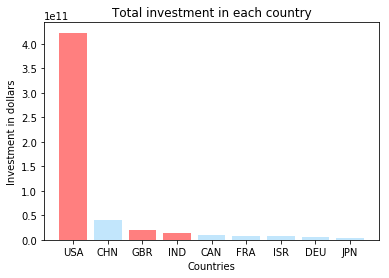

In [250]:
colors = ['red', 'lightskyblue', 'red', 'red','lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue', 'lightskyblue']
plt.bar(np.arange(len(top9.index)), top9, align='center', alpha=0.5, color = colors)
plt.xticks(np.arange(len(top9.index)), top9.index)
plt.ylabel('Investment in dollars')
plt.xlabel('Countries')
plt.title('Total investment in each country')
plt.show()
#plt.savefig('CountryInvestment.png')

#### Top 3 english countries out of above 9 countries with english as their official language are USA, GBR, and IND

In [48]:
top3 = master_frame[(master_frame.country_code == 'USA') | (master_frame.country_code == 'GBR')
                          | (master_frame.country_code == 'IND')]

In [49]:
top3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
8,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
9,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
10,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
16,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012


In [50]:
category = top3.category_list.str.strip()
for i in category.index:
    if isinstance(category[i],str) and category[i].find('|')>=0:
        category[i]=category[i][0:category[i].find('|')].strip()

In [59]:
category = category.str.lower()
top3.category_list = category

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [60]:
top3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN
8,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
9,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
10,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
16,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012


### Analyse mapping data

In [53]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [54]:
mapping.describe(include='all')

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
count,687,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
unique,687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Physicians,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.031977,0.001453,0.077035,0.129360,0.091570,0.058140,0.104651,0.283430,0.222384
std,NaN,0.176066,0.038125,0.266841,0.335843,0.288627,0.234177,0.306326,0.450991,0.416150
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [55]:
mapping.insert(1,'primaryCat','Blank')

In [56]:
mapping.category_list = mapping.category_list.str.strip()
mapping.category_list = mapping.category_list.str.lower()

In [58]:
for i in mapping.index:
    if mapping['Automotive & Sports'].loc[i] == 1:
        mapping['primaryCat'].loc[i] = 'Automotive & Sports'
    elif mapping['Cleantech / Semiconductors'].loc[i] == 1:
        mapping['primaryCat'].loc[i] = 'Cleantech / Semiconductors'
    elif mapping['Entertainment'].loc[i] == 1:
        mapping['primaryCat'].loc[i] = 'Entertainment'
    elif mapping['Health'].loc[i] == 1:
        mapping['primaryCat'].loc[i] = 'Health'
    elif mapping['Manufacturing'].loc[i] == 1:
        mapping['primaryCat'].loc[i] = 'Manufacturing'
    elif mapping['News, Search and Messaging'].loc[i] == 1:
        mapping['primaryCat'].loc[i] = 'News, Search and Messaging'
    elif mapping['Others'].loc[i] == 1:
        mapping['primaryCat'].loc[i] = 'Others'
    elif mapping['Social, Finance, Analytics, Advertising'].loc[i] == 1:
        mapping['primaryCat'].loc[i] = 'Social, Finance, Analytics, Advertising'

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [61]:
mapping.head()

,category_list,primaryCat,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,Blank,0,1,0,0,0,0,0,0,0
1,3d,Manufacturing,0,0,0,0,0,1,0,0,0
2,3d printing,Manufacturing,0,0,0,0,0,1,0,0,0
3,3d technology,Manufacturing,0,0,0,0,0,1,0,0,0
4,accounting,"Social, Finance, Analytics, Advertising",0,0,0,0,0,0,0,0,1


In [62]:
top3 = pd.merge(top3, mapping, how='left', on=['category_list'])

In [63]:
top3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,...,primaryCat,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,media,operating,...,Entertainment,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,analytics,operating,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,apps,acquired,...,"News, Search and Messaging",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
top3.groupby('country_code')['raised_amount_usd'].agg(['sum','count'])

,sum,count
country_code,,
GBR,2.024563e+10,2055
IND,1.439186e+10,824
USA,4.225108e+11,36139


In [249]:
top3.groupby(['country_code','primaryCat'])['raised_amount_usd'].agg('count')

country_code  primaryCat                             
GBR           Automotive & Sports                          44
              Blank                                        14
              Cleantech / Semiconductors                  433
              Entertainment                               133
              Health                                      118
              Manufacturing                               122
              News, Search and Messaging                  241
              Others                                      507
              Social, Finance, Analytics, Advertising     318
IND           Automotive & Sports                          31
              Blank                                         5
              Cleantech / Semiconductors                   54
              Entertainment                                75
              Health                                       42
              Manufacturing                                55
              Ne

In [65]:
D1 = top3[top3.country_code == 'USA']
D2 = top3[top3.country_code == 'GBR']
D3 = top3[top3.country_code == 'IND']

In [66]:
D1.groupby('primaryCat')['raised_amount_usd'].agg(['sum', 'count'])

,sum,count
primaryCat,,
Automotive & Sports,1.163216e+10,505
Blank,2.442813e+09,196
Cleantech / Semiconductors,1.187644e+11,7849
Entertainment,1.656783e+10,1756
Health,3.166093e+10,3263
Manufacturing,2.484532e+10,2453
"News, Search and Messaging",4.461932e+10,4301
Others,8.208458e+10,8243
"Social, Finance, Analytics, Advertising",6.206299e+10,5156


In [74]:
D1[D1.primaryCat=='Others'].sort_values('raised_amount_usd',ascending=False).head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,...,primaryCat,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
31407,/organization/social-finance,/funding-round/1609f1ba4de61c4760c91dc69f4ae980,venture,30-09-2015,1.000000e+09,/organization/social-finance,SoFi,http://www.sofi.com,education,operating,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8543,/organization/coreexpress,/funding-round/cbdb1b4d8a6391e2338fc371ec9b97e0,venture,12-06-2000,5.730000e+08,/organization/coreexpress,CoreExpress,http://www.coreexpress.net,services,acquired,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38586,/organization/zenefits,/funding-round/2db96f511dc2de33b6edc7844b7c240c,venture,06-05-2015,5.000000e+08,/organization/zenefits,Zenefits,http://www.zenefits.com,enterprise software,operating,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31321,/organization/snapchat,/funding-round/4a2de2da69d5ccaac8589108c8055e42,venture,31-12-2014,4.850000e+08,/organization/snapchat,Snapchat,http://www.snapchat.com,file sharing,operating,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19460,/organization/livingsocial,/funding-round/5c3bbce60473fdee90a52231099daa59,venture,04-04-2011,4.000000e+08,/organization/livingsocial,LivingSocial,http://www.livingsocial.com,e-commerce,operating,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
D1[D1.primaryCat=='Cleantech / Semiconductors'].sort_values('raised_amount_usd',ascending=False).head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,...,primaryCat,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
13173,/organization/freescale,/funding-round/a1495c088d886c8a4f4ce74403b77385,venture,21-10-2006,1.760000e+10,/organization/freescale,Freescale Semiconductor,http://www.freescale.com,semiconductors,ipo,...,Cleantech / Semiconductors,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17950,/organization/juno-therapeutics,/funding-round/f93ba64f2e858105c47ee4901dc71d74,venture,14-07-2015,8.498035e+08,/organization/juno-therapeutics,Juno Therapeutics,http://junotherapeutics.com,biotechnology,ipo,...,Cleantech / Semiconductors,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
33808,/organization/tenaska,/funding-round/e1e86b41979e5cf6d144f7ef614d056d,venture,17-04-2003,5.500000e+08,/organization/tenaska,Tenaska,http://www.tenaska.com/,energy,operating,...,Cleantech / Semiconductors,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14361,/organization/greatpoint-energy,/funding-round/10052412d43b77826e7f7cb57578da0f,venture,17-02-2012,4.200000e+08,/organization/greatpoint-energy,GreatPoint Energy,http://www.greatpointenergy.com,clean energy,operating,...,Cleantech / Semiconductors,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27545,/organization/quantrx-biomedical,/funding-round/773952f16706442262e83b2f5cef9322,venture,14-08-2009,4.060397e+08,/organization/quantrx-biomedical,QuantRx Biomedical,http://quantrx.com/underconstruction.htm,biotechnology,operating,...,Cleantech / Semiconductors,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
D2.groupby('primaryCat')['raised_amount_usd'].agg(['sum', 'count'])

,sum,count
primaryCat,,
Automotive & Sports,4.808787e+08,44
Blank,1.728144e+08,14
Cleantech / Semiconductors,5.028729e+09,433
Entertainment,1.141281e+09,133
Health,1.046655e+09,118
Manufacturing,1.019283e+09,122
"News, Search and Messaging",2.956024e+09,241
Others,4.400423e+09,507
"Social, Finance, Analytics, Advertising",2.851116e+09,318


In [71]:
D2[D2.primaryCat=='Others'].sort_values('raised_amount_usd',ascending=False).head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,...,primaryCat,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
24135,/organization/oneweb,/funding-round/0a9a5d2d5b49ac05b926325cbbbcfb49,venture,26-06-2015,500000000.0,/organization/oneweb,OneWeb,http://www.oneweb.world,technology,operating,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19303,/organization/liquid-telecom,/funding-round/9e4b34f81eca1b2d1d76432fa32414ce,venture,16-02-2015,150000000.0,/organization/liquid-telecom,Liquid Telecom,http://liquidtelecom.com/,telecommunications,operating,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30988,/organization/six-degrees-group,/funding-round/740244296674824e171842a8c5cf99b4,venture,10-10-2011,93863505.0,/organization/six-degrees-group,Six Degrees Group,http://www.6dg.co.uk,web hosting,operating,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12308,/organization/farfetch,/funding-round/9f4452e163e7c950728feb9a0f4592e2,venture,04-03-2015,86000000.0,/organization/farfetch,Farfetch,http://www.farfetch.com,e-commerce,operating,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12309,/organization/farfetch,/funding-round/d26dea731c7a47f5d0ce7754b1609001,venture,01-05-2014,66000000.0,/organization/farfetch,Farfetch,http://www.farfetch.com,e-commerce,operating,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [73]:
D2[D2.primaryCat=='Cleantech / Semiconductors'].sort_values('raised_amount_usd',ascending=False).head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,...,primaryCat,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16048,/organization/immunocore,/funding-round/6159299c71ab84032910b48ceed406cf,venture,16-07-2015,320000000.0,/organization/immunocore,Immunocore,http://immunocore.com,biotechnology,operating,...,Cleantech / Semiconductors,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28434,/organization/reneuron-group,/funding-round/2ac44d51d1f21f4002249a41111c260c,venture,10-07-2015,105148268.0,/organization/reneuron-group,ReNeuron Group,http://www.reneuron.com,biotechnology,operating,...,Cleantech / Semiconductors,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
790,/organization/adaptimmune,/funding-round/663f4223e4f1fabee76abe90dcda2795,venture,25-09-2014,104000000.0,/organization/adaptimmune,Adaptimmune,http://adaptimmune.com,biotechnology,ipo,...,Cleantech / Semiconductors,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2789,/organization/archimedes-pharma,/funding-round/c4efd7401c2e464890862cc9887bd2f1,venture,05-04-2010,99000000.0,/organization/archimedes-pharma,Archimedes Pharma,http://www.archimedespharma.com,biotechnology,acquired,...,Cleantech / Semiconductors,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7215,/organization/circassia,/funding-round/1ae53442fa2f5c3f0364b5961198fbca,venture,19-04-2011,98000000.0,/organization/circassia,Circassia,http://www.circassia.co.uk,biotechnology,operating,...,Cleantech / Semiconductors,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
D3.groupby('primaryCat')['raised_amount_usd'].agg(['sum', 'count'])

,sum,count
primaryCat,,
Automotive & Sports,1.556350e+09,31
Blank,1.303500e+08,5
Cleantech / Semiconductors,7.864446e+08,54
Entertainment,9.757053e+08,75
Health,5.643700e+08,42
Manufacturing,7.302600e+08,55
"News, Search and Messaging",1.739580e+09,130
Others,6.318507e+09,281
"Social, Finance, Analytics, Advertising",8.667639e+08,77


In [77]:
D3[D3.primaryCat=='Others'].sort_values('raised_amount_usd',ascending=False).head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,...,primaryCat,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
12803,/organization/flipkart,/funding-round/af6ac1c9d2f3050fd5e1530be3b9565f,venture,29-07-2014,1.000000e+09,/organization/flipkart,Flipkart,http://www.flipkart.com,e-commerce,operating,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12807,/organization/flipkart,/funding-round/fc494b8372efe09ff4622d1b3940a44d,venture,21-12-2014,7.000000e+08,/organization/flipkart,Flipkart,http://www.flipkart.com,e-commerce,operating,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33562,/organization/tata-teleservices,/funding-round/3de0fe717eba310239bbe06fd841cd72,venture,06-03-2006,2.120000e+08,/organization/tata-teleservices,Tata Teleservices,NaN,services,operating,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12799,/organization/flipkart,/funding-round/0f95a3605ce19904851d6af4b31bd37f,venture,26-05-2014,2.100000e+08,/organization/flipkart,Flipkart,http://www.flipkart.com,e-commerce,operating,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12800,/organization/flipkart,/funding-round/299d4ccf054fe9b04e96614c17d8a338,venture,10-07-2013,2.000000e+08,/organization/flipkart,Flipkart,http://www.flipkart.com,e-commerce,operating,...,Others,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
D3[D3.primaryCat=='News, Search and Messaging'].sort_values('raised_amount_usd',ascending=False).head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,...,primaryCat,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
27658,/organization/quikr-india,/funding-round/c3d8b1a4db1354d4c3dbc60a8171565f,venture,07-04-2015,150000000.0,/organization/quikr-india,Quikr,http://www.quikr.com,curated web,operating,...,"News, Search and Messaging",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27659,/organization/quikr-india,/funding-round/ce9bc87569765200a4ba52d06071e466,venture,11-03-2014,90000000.0,/organization/quikr-india,Quikr,http://www.quikr.com,curated web,operating,...,"News, Search and Messaging",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13149,/organization/freecharge,/funding-round/6584c8fed1cede9215e8d712a6534530,venture,05-02-2015,80000000.0,/organization/freecharge,FreeCharge,https://www.freecharge.in/,internet,acquired,...,"News, Search and Messaging",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15221,/organization/hike,/funding-round/73d21a2875dbc2e1f9fef92aeac3b72a,venture,26-08-2014,65000000.0,/organization/hike,hike,http://get.hike.in,messaging,operating,...,"News, Search and Messaging",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27655,/organization/quikr-india,/funding-round/75d6aa7365247e6c23fe83220a40c9c4,venture,17-09-2014,60000000.0,/organization/quikr-india,Quikr,http://www.quikr.com,curated web,operating,...,"News, Search and Messaging",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [127]:
first_country = D1.groupby('primaryCat')['raised_amount_usd'].agg('count').sort_values(ascending=False).head(3)
second_country = D2.groupby('primaryCat')['raised_amount_usd'].agg('count').sort_values(ascending=False).head(3)
third_country = D3.groupby('primaryCat')['raised_amount_usd'].agg('count').sort_values(ascending=False).head(3)

In [183]:
final_data = first_country.append(second_country)

In [184]:
final_data = final_data.append(third_country)

In [185]:
final_data

primaryCat
Others                                     8243
Cleantech / Semiconductors                 7849
Social, Finance, Analytics, Advertising    5156
Others                                      507
Cleantech / Semiconductors                  433
Social, Finance, Analytics, Advertising     318
Others                                      281
News, Search and Messaging                  130
Social, Finance, Analytics, Advertising      77
Name: raised_amount_usd, dtype: int64

In [194]:
new_data = pd.DataFrame(columns = ['country'])

In [195]:
new_data['country'] = np.concatenate((np.repeat('USA', 3), np.repeat('GBR', 3), np.repeat('IND', 3)))

In [197]:
new_data.insert(1, "category", final_data.index, True)
new_data.insert(2, "count", final_data.values, True)

In [198]:
new_data

,country,category,count
0,USA,Others,8243
1,USA,Cleantech / Semiconductors,7849
2,USA,"Social, Finance, Analytics, Advertising",5156
3,GBR,Others,507
4,GBR,Cleantech / Semiconductors,433
5,GBR,"Social, Finance, Analytics, Advertising",318
6,IND,Others,281
7,IND,"News, Search and Messaging",130
8,IND,"Social, Finance, Analytics, Advertising",77


In [128]:
import seaborn as sns

In [217]:
sns.x

<Figure size 36000x21600 with 0 Axes>

<Figure size 36000x21600 with 0 Axes>

[Text(0,0.5,'Number of investments'),
 Text(0.5,0,'Countries'),
 Text(0.5,1,'Number of investment in each country in top 3 sector')]

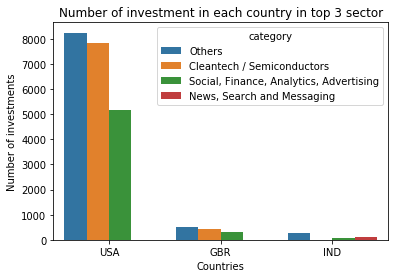

In [239]:
sns_plot = sns.barplot(hue="category", y="count", x="country", data=new_data);
sns_plot.set(xlabel='Countries', ylabel='Number of investments', title='Number of investment in each country in top 3 sector')

In [240]:
sns_plot.figure.savefig('investment_top3.png')